# Preparations

## CityScapes download

In [ ]:
# !pip install -q gdown

# file_id = "1MI8QsvjW0R6WDJiL49L7sDGpPWYAQB6O"
# !gdown https://drive.google.com/uc?id={file_id}

# !unzip Cityscapes.zip


## GTA5 download

In [ ]:
# !pip install -q gdown

# file_id = "1PWavqXDxuifsyYvs2PFua9sdMl0JG8AE"
# !gdown https://drive.google.com/uc?id={file_id}

# !unzip Gta5_extended.zip -d /content/Gta5_extended


# Main

In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as TF

import matplotlib.pyplot as plt

from datasets.cityscapes import CityScapes
from utils import tensorToImageCompatible, decode_segmap

transform = TF.Compose([
    TF.ToTensor(),
    TF.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225])
])

data = CityScapes("/content/Cityscapes/Cityspaces", split="val", transform=transform)
dataloader = DataLoader(data, batch_size=8, shuffle=True)

i = 0
img_tensor, color_tensor, label = next(iter(dataloader))

img = tensorToImageCompatible(img_tensor[i])
color = tensorToImageCompatible(color_tensor[i])
decoded_from_labelId = decode_segmap(label[i])

fig, ax = plt.subplots(2,2, figsize=(10,10), layout="tight")

ax[0,0].set_title("Original image")
ax[0,0].imshow(img)
ax[0,0].axis('off')

ax[0,1].set_title("Colored by label")
ax[0,1].imshow(color)
ax[0,1].axis('off')

ax[1,0].set_title("Reconstructed from class ID")
ax[1,0].imshow(decoded_from_labelId)
ax[1,0].axis('off')

ax[1,1].set_title("Raw Classes")
ax[1,1].imshow(label[i])
ax[1,1].axis('off')

None

![alt text](image.png "Title")


## GTA utilization

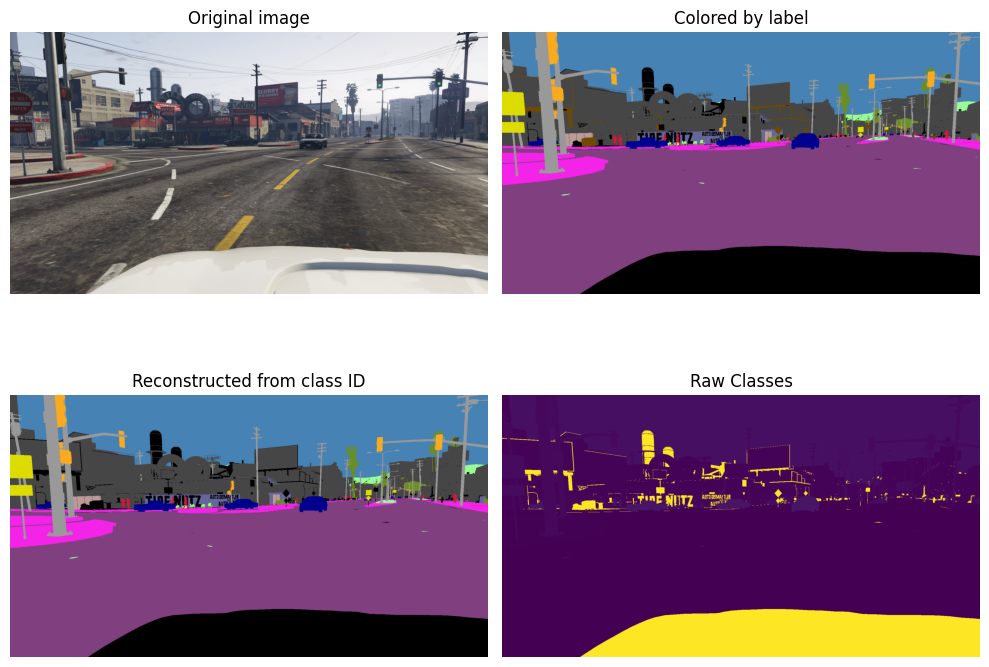

In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms as TF

from datasets.gta5 import GTA5

import matplotlib.pyplot as plt

from utils import tensorToImageCompatible, decode_segmap

transform = TF.Compose([
    TF.ToTensor(),
    TF.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225])
])

data = GTA5(rootdir="/content/Gta5_extended", split="train", train_split_percent=0.5, transform=transform)
dataloader = DataLoader(data, batch_size=8, shuffle=True)

i = 0
img_tensor, color_tensor, label = next(iter(dataloader))

img = tensorToImageCompatible(img_tensor[i])
color = tensorToImageCompatible(color_tensor[i])
decoded_from_labelId = decode_segmap(label[i])

fig, ax = plt.subplots(2,2, figsize=(10,10), layout="tight")

ax[0,0].set_title("Original image")
ax[0,0].imshow(img)
ax[0,0].axis('off')

ax[0,1].set_title("Colored by label")
ax[0,1].imshow(color)
ax[0,1].axis('off')

ax[1,0].set_title("Reconstructed from class ID")
ax[1,0].imshow(decoded_from_labelId)
ax[1,0].axis('off')

ax[1,1].set_title("Raw Classes")
ax[1,1].imshow(label[i])
ax[1,1].axis('off')

None